In [1]:
# Importing important libraries 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# Import data set and make sure the datetime is correctly specified.
df = pd.read_csv('PJM(AEP)_energy_dataset.csv')
df.index = pd.to_datetime(df['Datetime'])
df.drop(columns='Datetime', inplace=True)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [3]:
# Sort the data by Date 
df.sort_index(inplace=True)

In [4]:
# Type of data
df.describe()
df.columns

Index(['PJME_MW'], dtype='object')

In [5]:
# Look at the range of the data by date
df.index

DatetimeIndex(['2002-01-01 01:00:00', '2002-01-01 02:00:00',
               '2002-01-01 03:00:00', '2002-01-01 04:00:00',
               '2002-01-01 05:00:00', '2002-01-01 06:00:00',
               '2002-01-01 07:00:00', '2002-01-01 08:00:00',
               '2002-01-01 09:00:00', '2002-01-01 10:00:00',
               ...
               '2018-08-02 15:00:00', '2018-08-02 16:00:00',
               '2018-08-02 17:00:00', '2018-08-02 18:00:00',
               '2018-08-02 19:00:00', '2018-08-02 20:00:00',
               '2018-08-02 21:00:00', '2018-08-02 22:00:00',
               '2018-08-02 23:00:00', '2018-08-03 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

In [6]:
#  Sort the data by Date Train Test SPlit 70% train 30% test
def get_train_test_generic(freq=None):
    df = pd.read_csv('PJM(AEP)_energy_dataset.csv')
    df.index = pd.to_datetime(df['Datetime'])
    df.drop(columns='Datetime', inplace=True)
    df.sort_index(inplace=True)
    if freq is not None:
        df = df[['PJME_MW']].resample(freq).sum()
    train_len = int(.7*len(df))
    train = df.iloc[:train_len].copy()
    test = df.iloc[train_len:].copy()
    return train, test, df

In [7]:
# Look at the head of the data set
print(df.shape)
df.head()

(145366, 1)


,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0


In [ ]:
############################################################# skip  ############################################################

In [51]:
# Drop some of the data points #######################################################################################
#data = df[df.index >= '2004-01-01']
old = df[df.index < '2008-01-01']
new= df[(df.index > '2008-01-01') | (df.index == '2008-01-01')]

print(old.shape)
print(new.shape)
print(new.head())

(52571, 1)
(92795, 1)
                     PJME_MW
Datetime                    
2008-01-01 00:00:00  30998.0
2008-01-01 01:00:00  29596.0
2008-01-01 02:00:00  28578.0
2008-01-01 03:00:00  27570.0
2008-01-01 04:00:00  26976.0


In [40]:
new.dtypes

PJME_MW    float64
dtype: object

In [54]:
trn_h = new[new.index < '2016-01-01']
tst_h= new[(new.index > '2016-01-01') | (new.index == '2016-01-01')]
print(trn_h.head())
print(tst_h.head())

                     PJME_MW
Datetime                    
2008-01-01 00:00:00  30998.0
2008-01-01 01:00:00  29596.0
2008-01-01 02:00:00  28578.0
2008-01-01 03:00:00  27570.0
2008-01-01 04:00:00  26976.0
                     PJME_MW
Datetime                    
2016-01-01 00:00:00  26686.0
2016-01-01 01:00:00  25509.0
2016-01-01 02:00:00  24599.0
2016-01-01 03:00:00  23896.0
2016-01-01 04:00:00  23567.0


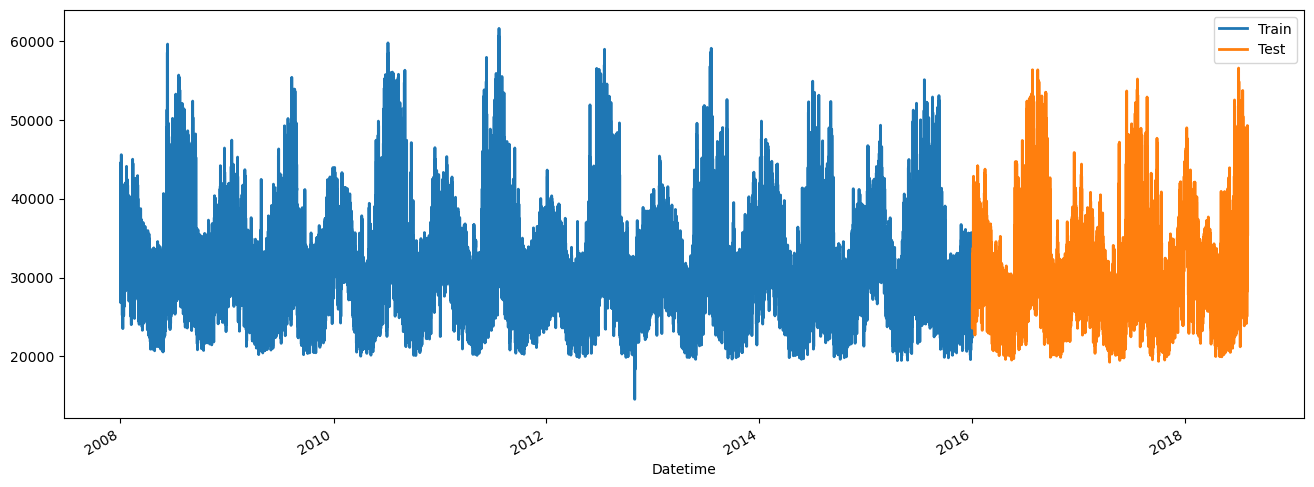

(70115, 1)
(22680, 1)


In [56]:

rcParams['figure.figsize'] = 16,6
trn_h['PJME_MW'].plot(label='Train', legend=True, linewidth=2)
tst_h['PJME_MW'].plot(label='Test', legend=True, linewidth=2)
plt.show()
print(trn_h.shape)
print(tst_h.shape)

In [46]:
trh

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2013-08-11 16:00:00,38056.0
2013-08-11 17:00:00,39099.0
2013-08-11 18:00:00,39749.0


In [ ]:
###########################################################  Back Here #######################################################

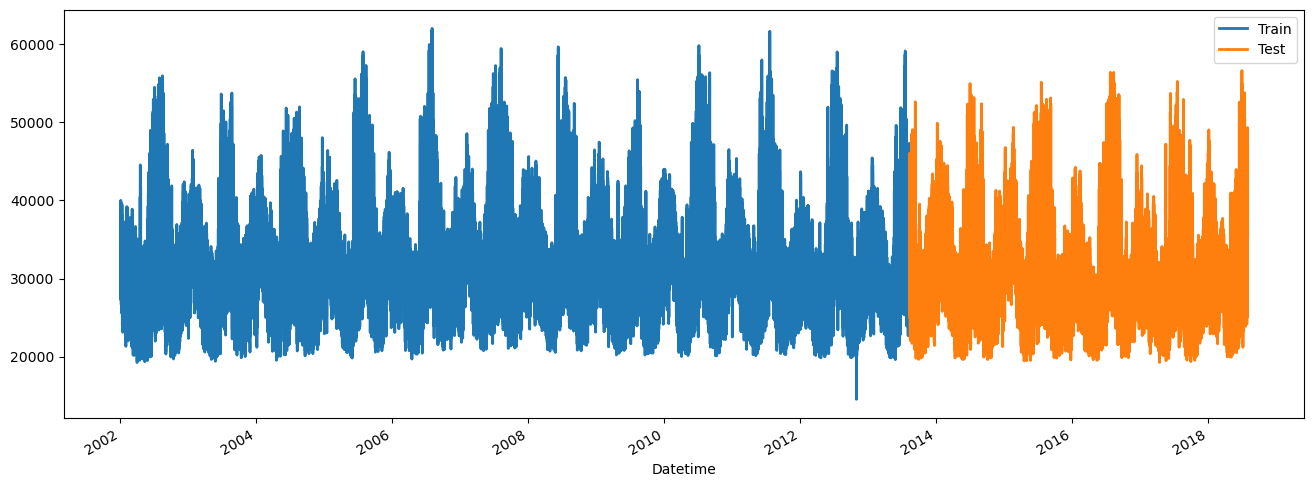

(101756, 1)
(43610, 1)


In [20]:
# Plot the training and test set on same plot
from pylab import rcParams
trn, tst, df = get_train_test_generic()
rcParams['figure.figsize'] = 16,6
trn['PJME_MW'].plot(label='Train', legend=True, linewidth=2)
tst['PJME_MW'].plot(label='Test', legend=True, linewidth=2)
plt.show()
print(trn.shape)
print(tst.shape)

<Axes: title={'center': '2016 Energy consumption'}, xlabel='Datetime'>

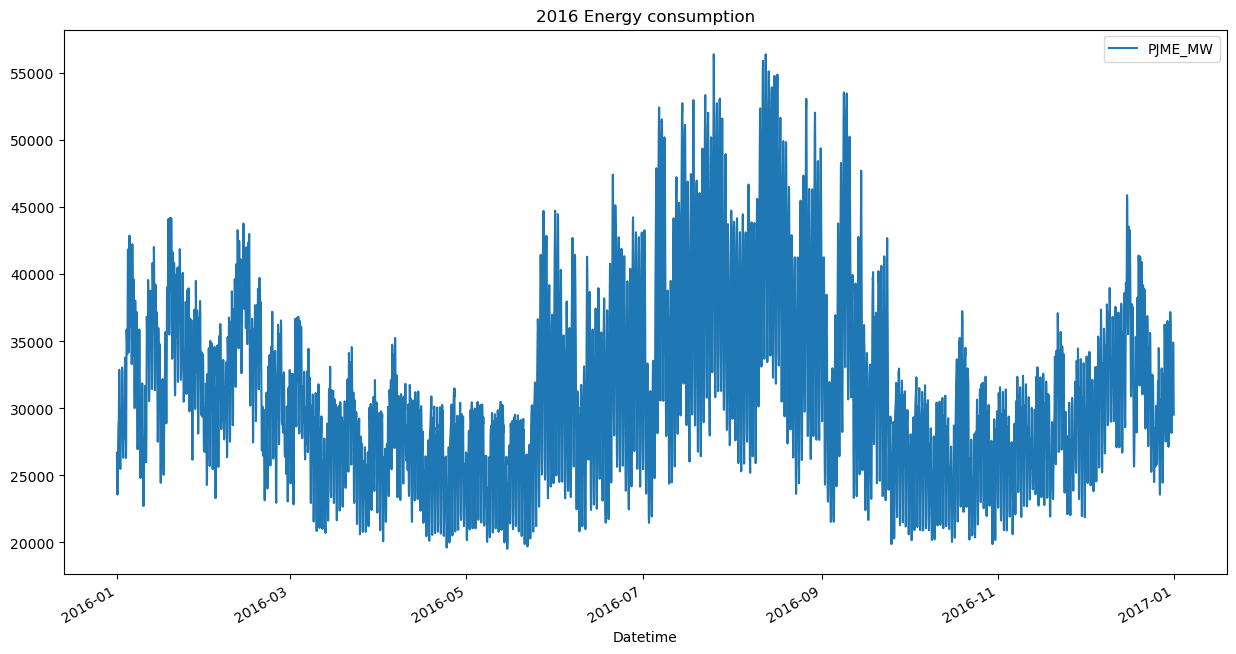

In [10]:
## The year 2016 overall data to have a closer look
# You can see that higher energy consumption between jully and august 
df.loc[df.index.year==2016].plot(figsize=(15, 8), 
                                title='2016 Energy consumption')

In [10]:
############################################## 

<Axes: title={'center': 'January 2016 Daily Energy consumption'}, xlabel='Datetime'>

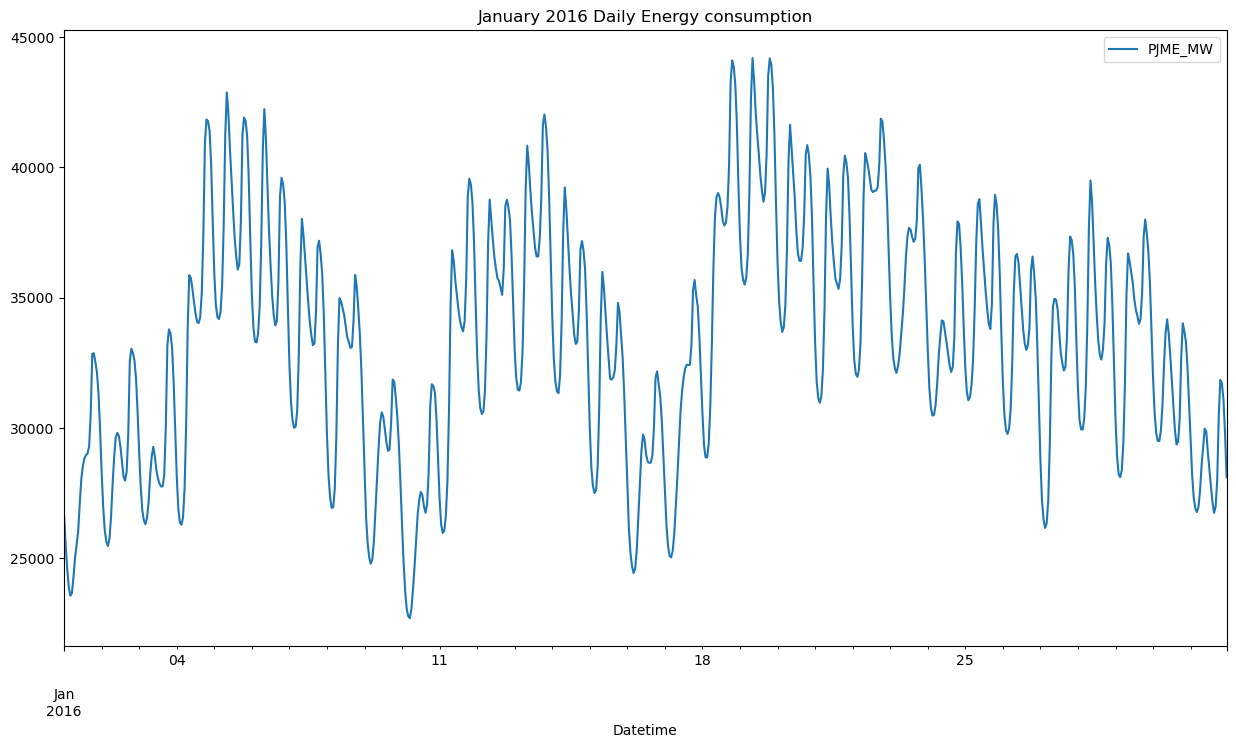

In [21]:
# Look into January 2016 deep dive into weekly seasonality 
df.loc[(df.index.year==2016) & (df.index.month == 1)].plot(figsize=(15, 8), 
                                title='January 2016 Daily Energy consumption')
# Appears to have;
# 1. Daily seasonality. 
# 2. Weekly seasonality as Consumption increased during week days and decrease in weekends.

                     PJME_MW
Datetime                    
2002-01-01 01:00:00  30393.0
2002-01-01 02:00:00  29265.0
2002-01-01 03:00:00  28357.0
2002-01-01 04:00:00  27899.0
2002-01-01 05:00:00  28057.0


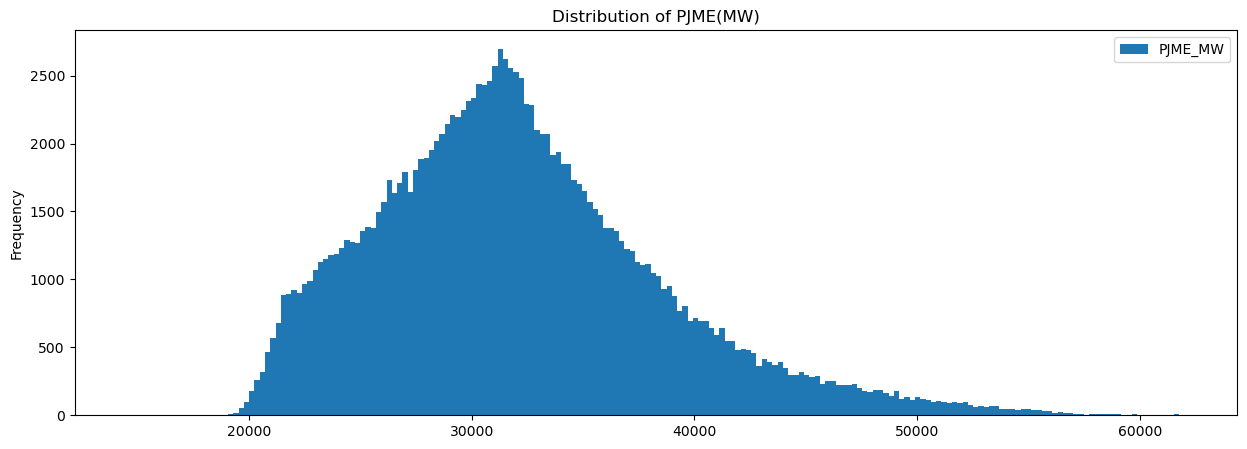

In [22]:
# Exploratory Data Analysis
df.plot.hist(figsize=(15, 5), bins=200, title='Distribution of PJME(MW)')
print(trn.head())

In [13]:
######################                           Decomposition                   ###############################

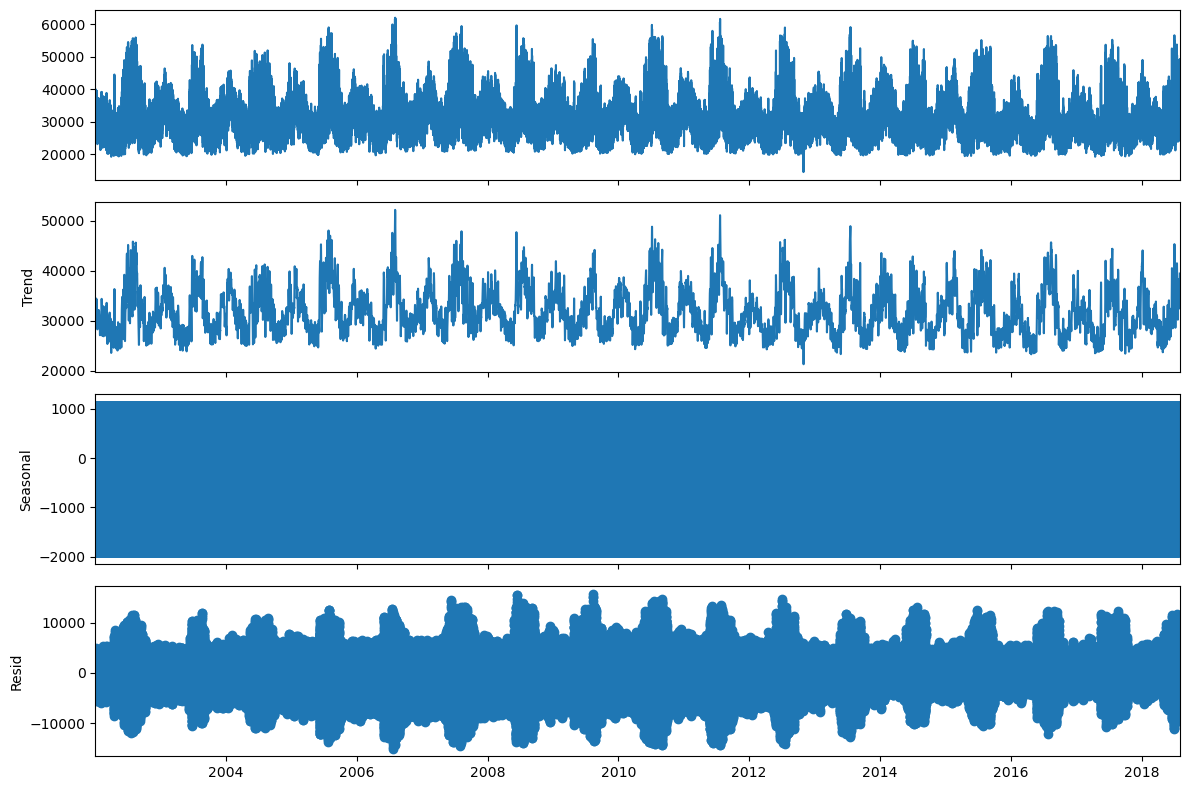

In [13]:
# Decomposing the time series of the entire data set shows no seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df[['PJME_MW']], period=48)
rcParams['figure.figsize']=12,8
fig=result.plot()
## Best if we look deeper into the data set at daily, weekly, monthly level 

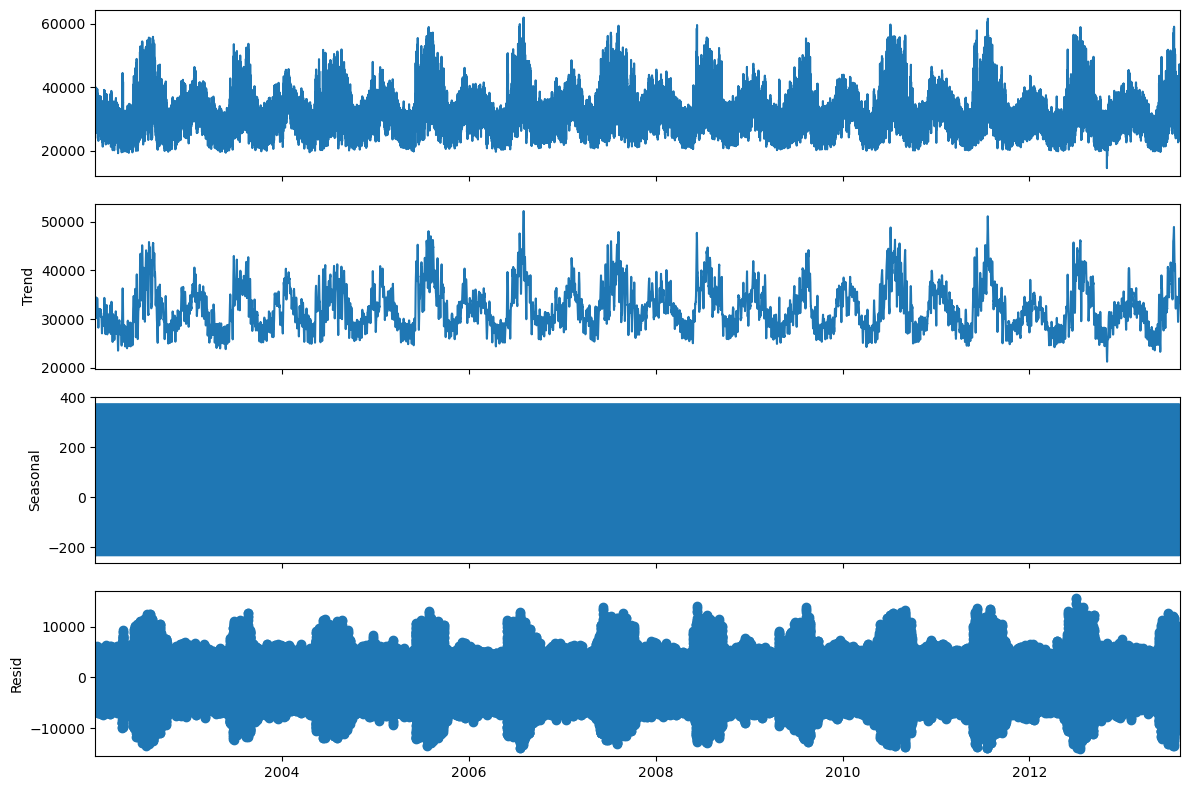

In [23]:
# Decomposing the time series of the training set
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(trn[['PJME_MW']], period=48)
rcParams['figure.figsize']=12,8
fig=result.plot()

,PJME_MW
Datetime,
2013-01-01 00:00:00,29864.0
2013-01-01 01:00:00,28386.0
2013-01-01 02:00:00,27250.0
2013-01-01 03:00:00,26252.0
2013-01-01 04:00:00,25755.0


                     PJME_MW
Datetime                    
2002-01-01 01:00:00  30393.0
2002-01-01 02:00:00  29265.0
2002-01-01 03:00:00  28357.0
2002-01-01 04:00:00  27899.0
2002-01-01 05:00:00  28057.0


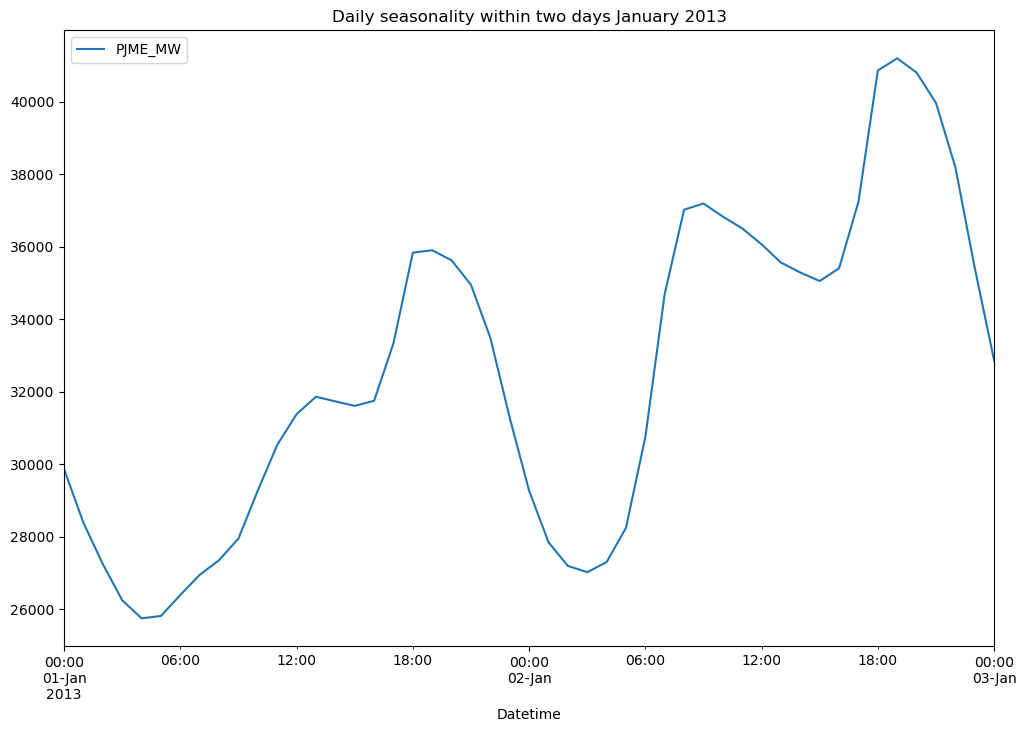

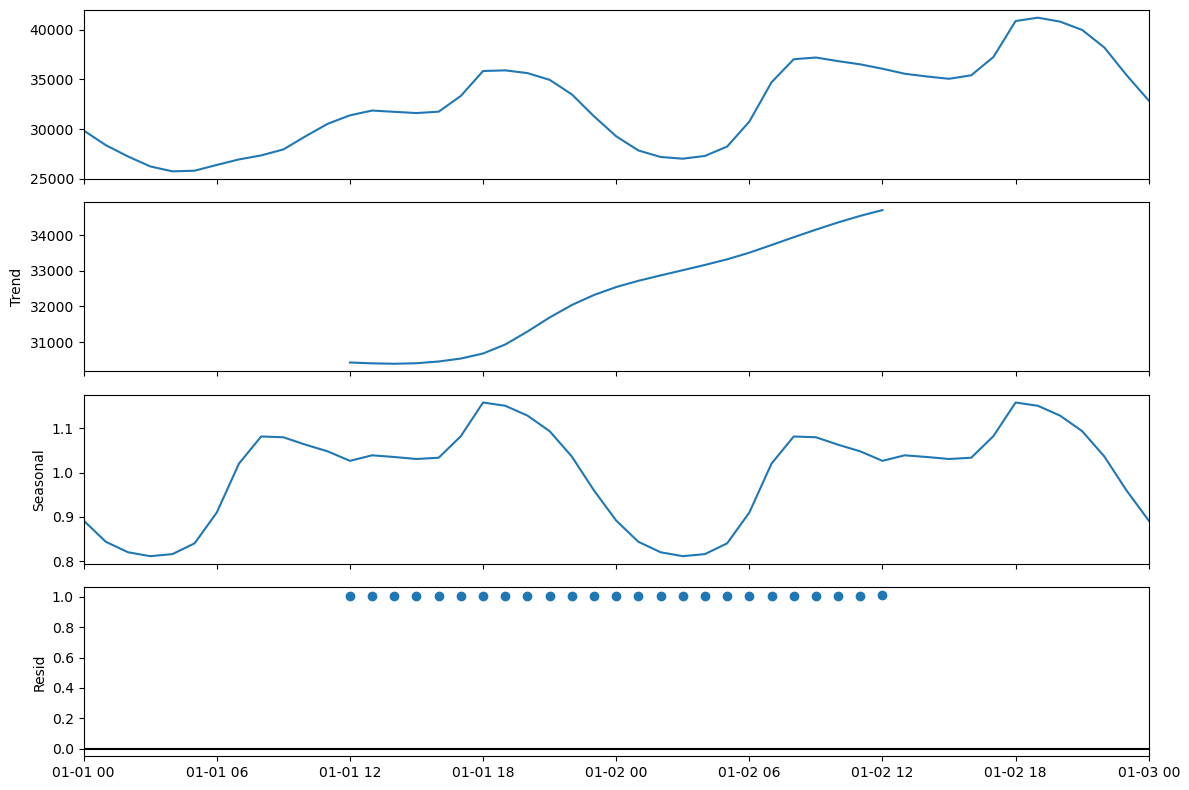

In [26]:
# 2 days seasonality within a month 
trn_day = trn.loc[(trn.index >= '2013-01-01') & (trn.index <= '2013-01-03')]
display(trn_day.head())
trn_day = trn_day.sort_index()
trn_day.plot( title='Daily seasonality within two days January 2013')
result = seasonal_decompose(trn_day, model='mul')
rcParams['figure.figsize']=12,8
fig=result.plot()
print(tr.head())

,PJME_MW
Datetime,
2012-03-01 00:00:00,27845.0
2012-03-01 01:00:00,26161.0
2012-03-01 02:00:00,25202.0
2012-03-01 03:00:00,24714.0
2012-03-01 04:00:00,24535.0


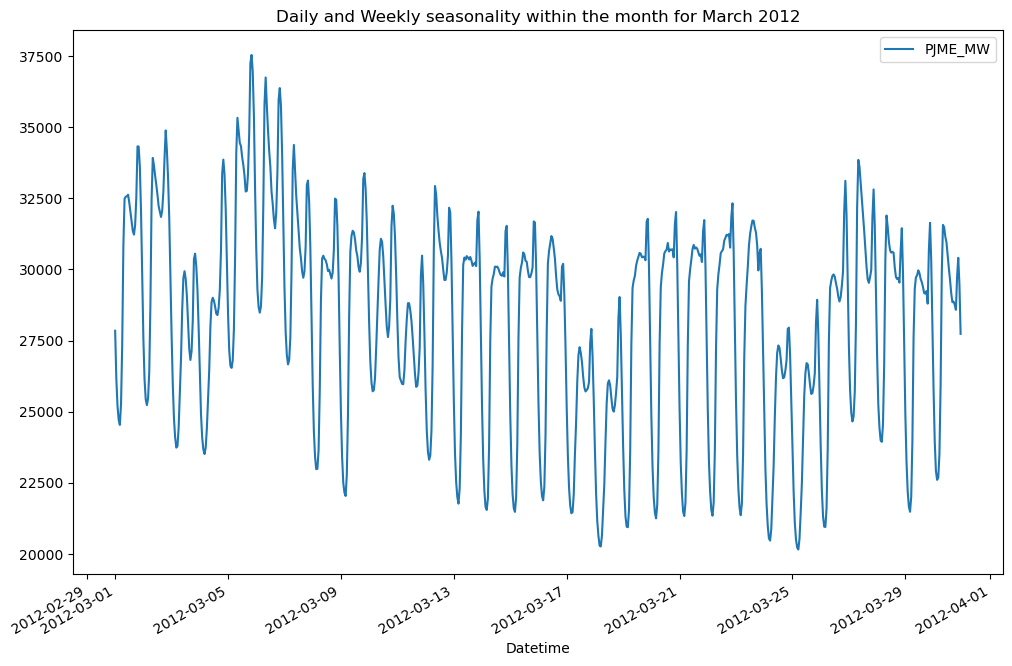

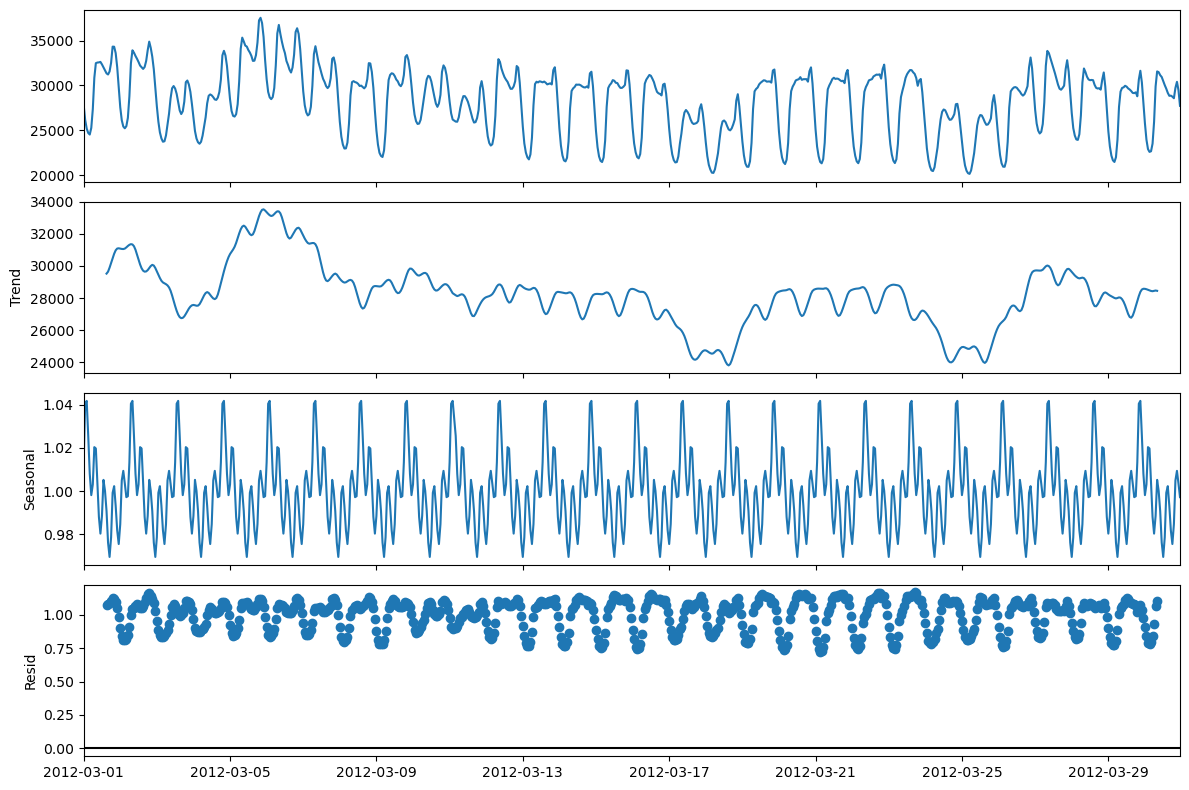

In [28]:
# Checking whether Daily seasonality exist within a month closer look  
trn_sub = trn.loc[(trn.index >= '2012-03-01') & (trn.index < '2012-03-31')]
display(trn_sub.head())
#trn_sub = trn_sub.sort_index()
trn_sub.plot( title='Daily and Weekly seasonality within the month for March 2012')
result = seasonal_decompose(trn_sub,  model='mul', period=30)
rcParams['figure.figsize']=12,8
fig=result.plot()
# We can clearly see;
# 1. Daily seasonality. 
# 2. Weekly seasonality as Consumption increased during week days and decrease in weekends.

Datetime
2002-01-31    31075.399731
2002-02-28    30239.166667
2002-03-31    28875.256720
2002-04-30    28534.731572
2002-05-31    28073.653226
Freq: ME, Name: PJME_MW, dtype: float64

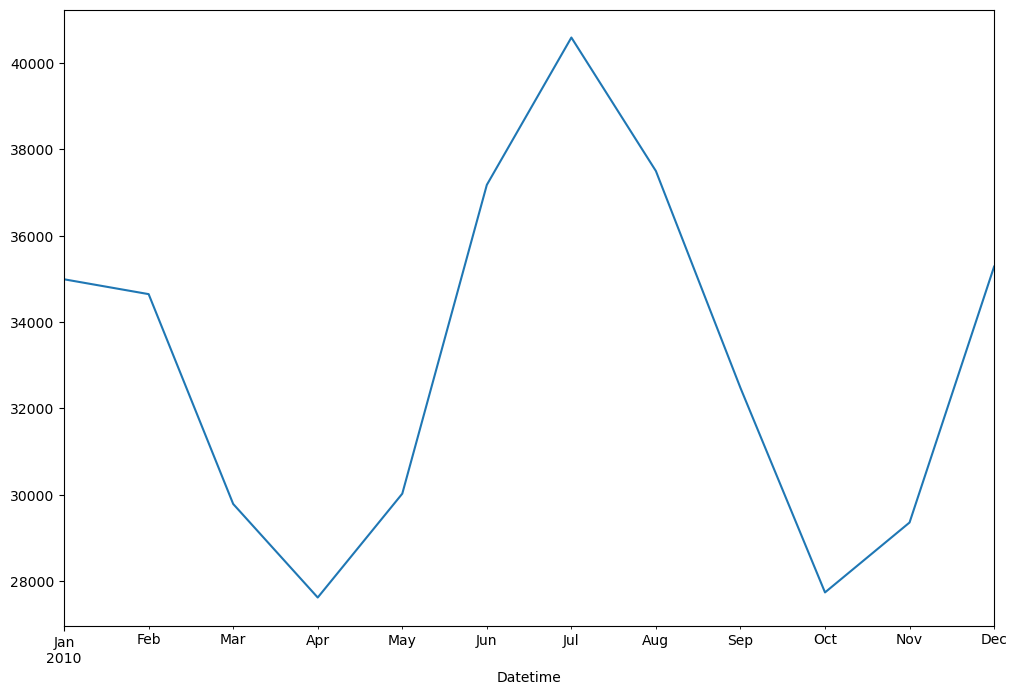

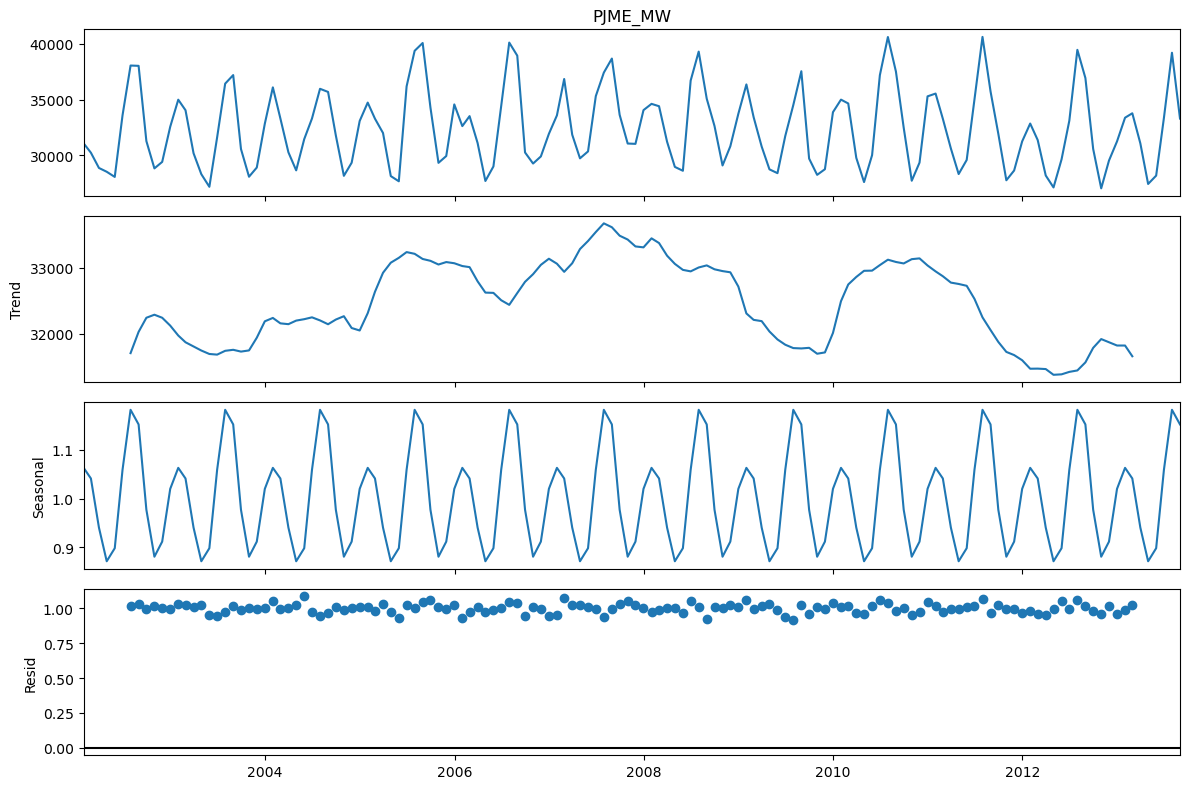

In [31]:
# MOnthly Seasonality
# Decompose and look at Monthly seasonality in 2011 shows the months June, Jully and August have high energy consumption
# with Jully being the highest
monthly = trn['PJME_MW'].resample('1M').mean()
display(monthly.head())
rcParams['figure.figsize']=12,8
monthly.loc[(monthly.index > '2010') & (monthly.index < '2011')].plot()
result = seasonal_decompose(monthly, period=12, model='mul')
rcParams['figure.figsize']=12,8
title='One year energy consumption'
fig=result.plot()

In [ ]:
##################################################################################################################
####################### Useful Validation metrices and plots ##############################

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def validate_1(test_df, pred_df, var):
    pred_res = pred_df[var]
    test = test_df[var]
    mse = mean_squared_error(pred_res, test)
    rmse = mean_squared_error(pred_res, test, squared=False)
    mae = mean_absolute_error(pred_res, test)
    mape = mean_absolute_percentage_error(pred_res, test)
    print("mse={:.3f}, rmse={:.3f}, mae={:.3f}, mape={:.3f}".format(mse, rmse, mae, mape))
    return mse, rmse, mae, mape

#make sure the index is datetime variable
def plot_and_validate_1(train_df, test_df, pred_df, var):
    rcParams['figure.figsize'] = 16,6
    train_df[var].plot(label='Train', legend=True, linewidth=2) 
    test_df[var].plot(label='Test', legend=True, linewidth=2)
    pred_df[var].plot(label='Pred', legend=True, linewidth=2)
    validate(test_df, pred_df, var)

def smape_func(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)))

def validate(test_df, pred_df, te_var, pred_var):
    merged = test_df.merge(pred_df, left_index=True, right_index=True)
    pred_res = merged[te_var] 
    test = merged[pred_var]
    mse = mean_squared_error(pred_res, test)
    rmse = mean_squared_error(pred_res, test, squared=False)
    mae = mean_absolute_error(pred_res, test)
    mape = mean_absolute_percentage_error(pred_res, test)
    smape = smape_func(te, pred_res)
    print("mse={:.3f}, rmse={:.3f}, mae={:.3f}, mape={:.3f}, smape={:.3f}".format(mse, rmse, mae, mape, smape))
    return mse, rmse, mae, mape, smape

#make sure the index is datetime variable
def plot_and_validate(train_df, test_df, pred_df, te_var, pred_var):
    rcParams['figure.figsize']=16,6
    train_df[te_var].plot(label='Train', legend=True, linewidth=2) 
    merged = test_df.merge(pred_df, left_index=True, right_index=True)
    merged[te_var].plot(label='Test', legend=True, linewidth=2)
    merged[pred_var].plot(label='Pred', legend=True, linewidth=2)
    validate(test_df, pred_df, te_var, pred_var)

In [26]:
##########################################################################################################################
######################## Auto Correlation plots ##########################################################################

[1.         0.97379973 0.90419662 0.80612294 0.69214209 0.57319037
 0.45999256 0.3618364  0.28463665 0.22993346 0.19482723 0.17416541
 0.16449831 0.16525779 0.17715503 0.20361419 0.24964236 0.31801598
 0.40710731 0.51090368 0.62011531 0.7241747  0.81250497 0.87343091
 0.89349024 0.8648004  0.79516491 0.69814218 0.585627   0.46838352
 0.3569984  0.26052767 0.18458646 0.13053215 0.09564503 0.07506328
 0.06540224 0.0660419  0.07774197 0.10383794 0.14903106 0.21591036
 0.30298889 0.40448112 0.51121658 0.61264947 0.69828081 0.75703334
 0.77676072 0.75042908 0.68507725]


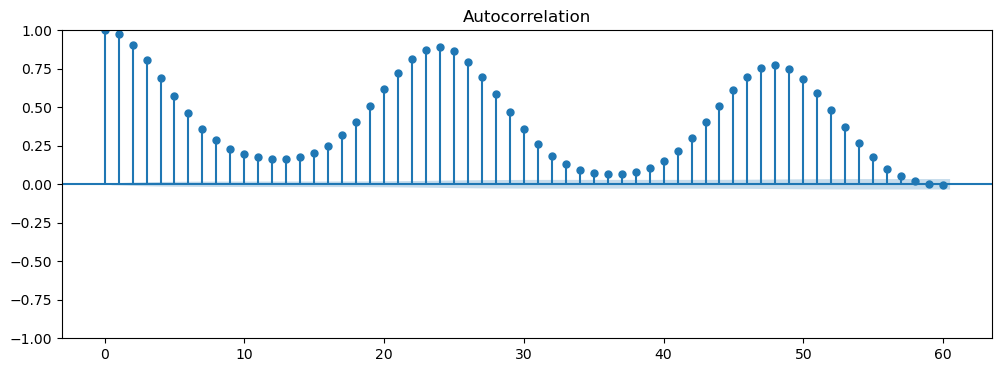

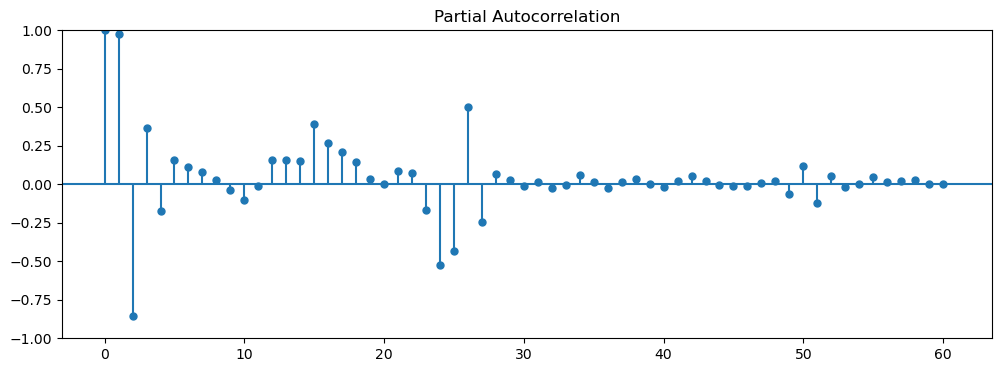

                     PJME_MW
Datetime                    
2002-01-01 01:00:00  30393.0
2002-01-01 02:00:00  29265.0
2002-01-01 03:00:00  28357.0
2002-01-01 04:00:00  27899.0
2002-01-01 05:00:00  28057.0


(101756, 1)

In [33]:
### Autocorrelation of the overall data using hourly time series
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print(acf(trn['PJME_MW']))
rcParams['figure.figsize']=12,4
plot_acf(trn['PJME_MW'], lags=60) 
plot_pacf(trn['PJME_MW'], lags=60)
plt.show()
print(trn.head())
trn.shape

[1.         0.97476421 0.90751158 0.81247953 0.70185988 0.58636027
 0.47642875 0.38105031 0.30595252 0.25264093 0.21832143 0.1980471
 0.18851645 0.18917872 0.20069852 0.22632964 0.27085645 0.33694112
 0.42299609 0.52321889 0.6286453  0.72901079 0.81400307 0.87233639
 0.89121166 0.86322437 0.795731   0.70164138 0.59246237 0.47868245
 0.37057971 0.27690367 0.20309156 0.1504664  0.11639705 0.09621051
 0.086676   0.08719917 0.09848814 0.12370551 0.16734466 0.23190083
 0.31593458 0.41386879 0.51686472 0.61470246 0.69717236 0.75357101
 0.77232415 0.74680449 0.6836447  0.59456926]


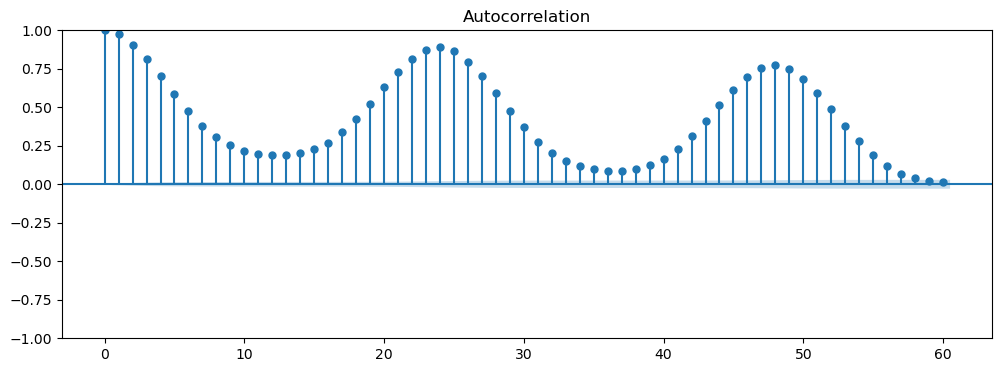

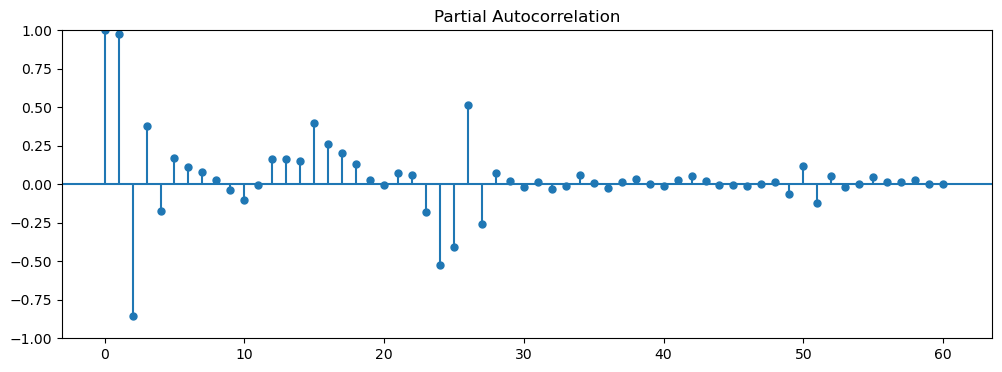

In [34]:
### Autocorrelation of the overall data
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print(acf(df['PJME_MW']))
rcParams['figure.figsize']=12,4
plot_acf(df['PJME_MW'], lags=60) 
plot_pacf(df['PJME_MW'], lags=60)
plt.show()

In [ ]:
########################### For ARIMA Modelling, we will try out different time series of the data ################################

In [ ]:
######################################################## Daily Data ############################################################

In [35]:
### To effectively model the data, we use 
### 1. daily time series 
trnd, tstd, df = get_train_test_generic(freq='1D')
print(trnd.head())
print(trnd.shape)
print(tstd.shape)

             PJME_MW
Datetime            
2002-01-01  714857.0
2002-01-02  822277.0
2002-01-03  828285.0
2002-01-04  809171.0
2002-01-05  729723.0
(4241, 1)
(1818, 1)


[1.         0.85710611 0.6698942  0.57611133 0.53687427 0.54074032
 0.61316371 0.67167419 0.59895082 0.51134755 0.48078529 0.47111889
 0.48445274 0.55366381 0.60352308 0.52467995 0.43454791 0.40266457
 0.39286049 0.40538893 0.47563928 0.53029443 0.45404367 0.36228301
 0.32818593 0.31923622 0.33361309 0.40263647 0.45154052 0.36393427
 0.25684118 0.2126806  0.20135945 0.21725679 0.2865662  0.33802502
 0.2562316 ]


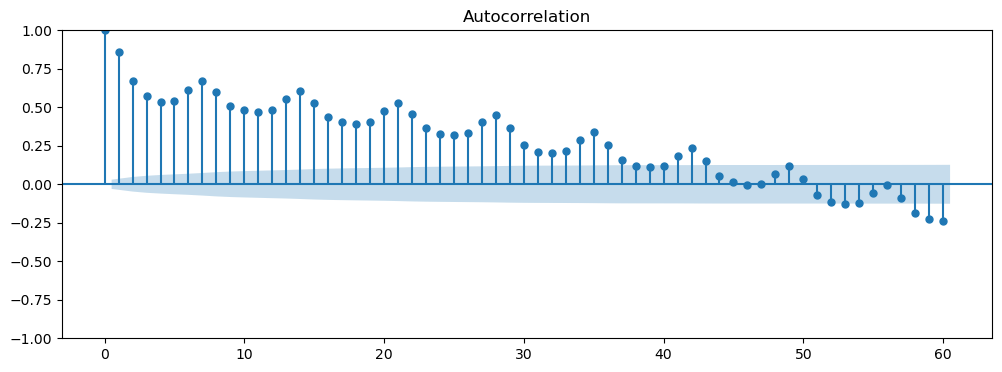

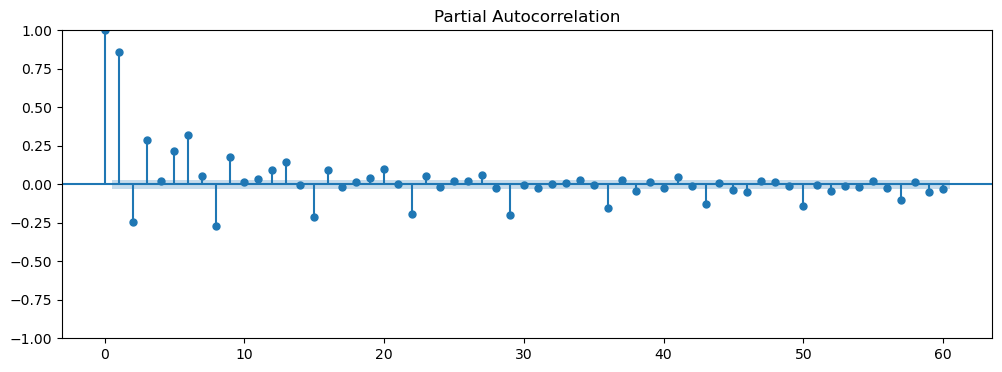

In [36]:
### Autocorrelation plot and partial autocorrelation 
print(acf(trnd['PJME_MW']))
rcParams['figure.figsize']=12,4
plot_acf(trnd['PJME_MW'], lags=60) 
plot_pacf(trnd['PJME_MW'], lags=60)
plt.show()

In [37]:
### To effectively model the data, we use 
### 2. weekly time series  
trnw, tstw, df = get_train_test_generic(freq='7D')
print(trnw.head())
print(trnw.shape)

              PJME_MW
Datetime             
2002-01-01  5432091.0
2002-01-08  5248340.0
2002-01-15  5304051.0
2002-01-22  4993047.0
2002-01-29  4978830.0
(606, 1)


[ 1.          0.79566081  0.69051574  0.58138131  0.46121845  0.32029185
  0.16771802  0.00964061 -0.1608557  -0.30526824 -0.41706575 -0.51270584
 -0.57951341 -0.58749421 -0.57841384 -0.52069953 -0.45152047 -0.34601946
 -0.23692938 -0.11868659  0.01509891  0.13914912  0.23957631  0.34586799
  0.42690977  0.49084341  0.49592132  0.48558944]


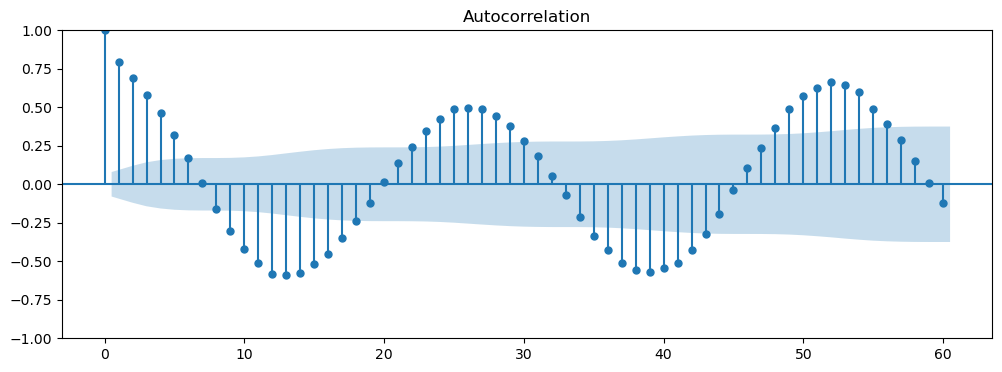

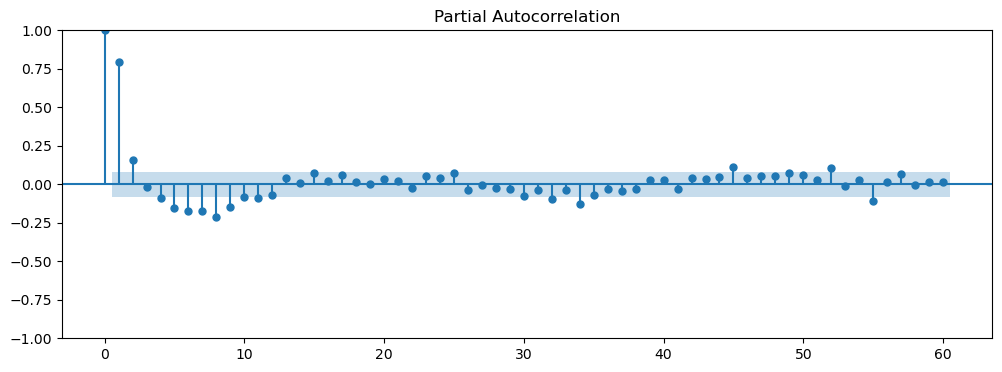

In [38]:
### Autocorrelation plot and partial autocorrelation for weekly time series
print(acf(trnw['PJME_MW']))
rcParams['figure.figsize']=12,4
plot_acf(trnw['PJME_MW'], lags=60) 
plot_pacf(trnw['PJME_MW'], lags=60)
plt.show()

In [39]:
### To effectively model the data, we use 
### 3. Monthly time series  
trnm, tstm, df = get_train_test_generic(freq='1M') ####################################################################################################
print(trnm.head())
print(trnm.shape)

               PJME_MW
Datetime              
2002-01-31  23089022.0
2002-02-28  20320720.0
2002-03-31  21483191.0
2002-04-30  20516472.0
2002-05-31  20886798.0
(140, 1)


[ 1.          0.46318381 -0.26212439 -0.61879686 -0.34574803  0.210861
  0.4602063   0.24214784 -0.34087565 -0.60682899 -0.27093283  0.38459486
  0.78862502  0.38266221 -0.24548799 -0.58225131 -0.32156447  0.19746981
  0.4041805   0.2177235  -0.31417136 -0.56484818]


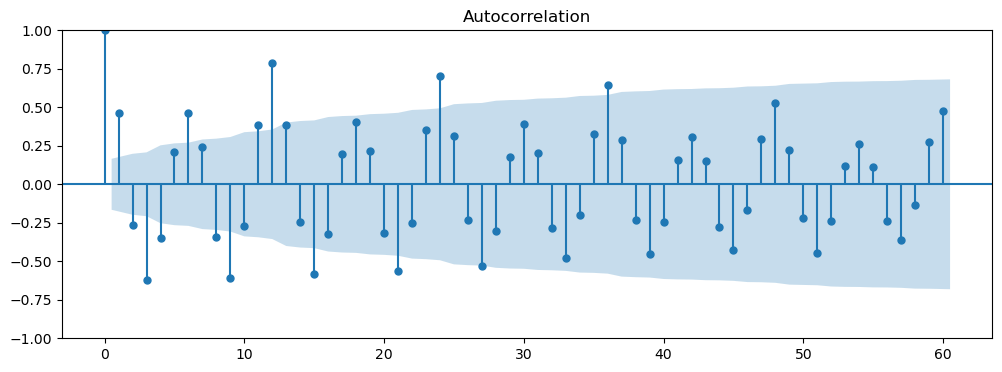

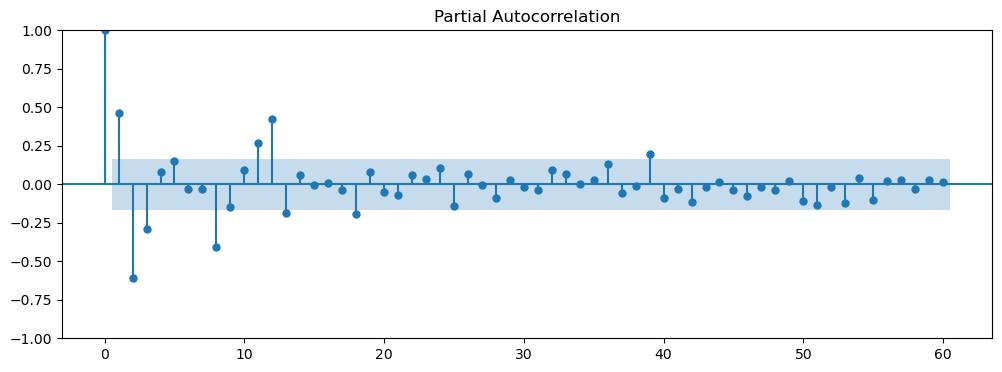

In [40]:
### Autocorrelation plot and partial autocorrelation for weekly time series
print(acf(trnm['PJME_MW']))
rcParams['figure.figsize']=12,4
plot_acf(trnm['PJME_MW'], lags=60) 
plot_pacf(trnm['PJME_MW'], lags=60)
plt.show()

In [41]:
#################### ARIMA Modelling ######################################### 

In [42]:
############ Hourly frequency 
tr.shape
start = time.time()
display(tr.head())
model_hr = auto_arima(tr, max_p=2, start_q=0, max_q=1, max_P=2,
                      max_Q=1, m=24, trace=True, njobs= -1)
print(model_hr)
print("total time taken = {}".format(time.time()-start))

NameError: name 'time' is not defined

In [54]:
print(trnd.shape)
print(tstd.shape)

(4241, 1)
(1818, 1)


In [68]:
############ Modelling Daily frequency of the time series ######################################################
import time                           #model_d = auto_arima(trnd, max_p=2, start_q=0, max_q=1, 
                                               # max_P=2, max_Q=1, m=7, trace=True, njobs= -1)
from pmdarima import auto_arima
start = time.time()
display(trnd.head())
model_day = auto_arima(trnd, m=7, trace=True, njobs= -1)
print(model_d)
print("total time taken = {}".format(time.time()-start))

,PJME_MW
Datetime,
2002-01-01,714857.0
2002-01-02,822277.0
2002-01-03,828285.0
2002-01-04,809171.0
2002-01-05,729723.0


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=9.65 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=110633.851, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=104080.481, Time=1.72 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=107407.848, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=127174.992, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=105010.008, Time=0.21 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=103882.487, Time=7.15 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=103856.297, Time=10.50 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=104058.305, Time=4.43 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=18.39 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=103948.594, Time=9.67 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=14.15 sec
 ARIMA(2,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=20.56 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=103309.525, Time=13.39 sec
 ARIMA(1,0,1)(1,0,1)[7] inte

In [51]:
# Define the model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_d = SARIMAX(trnd, order=(3, 0, 2), seasonal_order=(2, 0, 1, 7))
# Fit the model
results = model_d.fit()
# Print the model summary
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             PJME_MW   No. Observations:                 4241
Model:             SARIMAX(3, 0, 2)x(2, 0, [1], 7)   Log Likelihood              -51236.599
Date:                             Wed, 10 Jul 2024   AIC                         102491.198
Time:                                     14:06:25   BIC                         102548.371
Sample:                                 01-01-2002   HQIC                        102511.404
                                      - 08-11-2013                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7224      0.056     30.660      0.000       1.612       1.833
ar.L2         -0.8956      

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Calculate MAE
mae = mean_absolute_error(tstd, pred_d)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(tstd, pred_d)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate MAPE
mape = mean_absolute_percentage_error(tstd, pred_d)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error (MAE): 102073.69174746767
Mean Squared Error (MSE): 14573766013.404995
Mean Absolute Percentage Error (MAPE): 0.15400385021207458


NameError: name 'te' is not defined

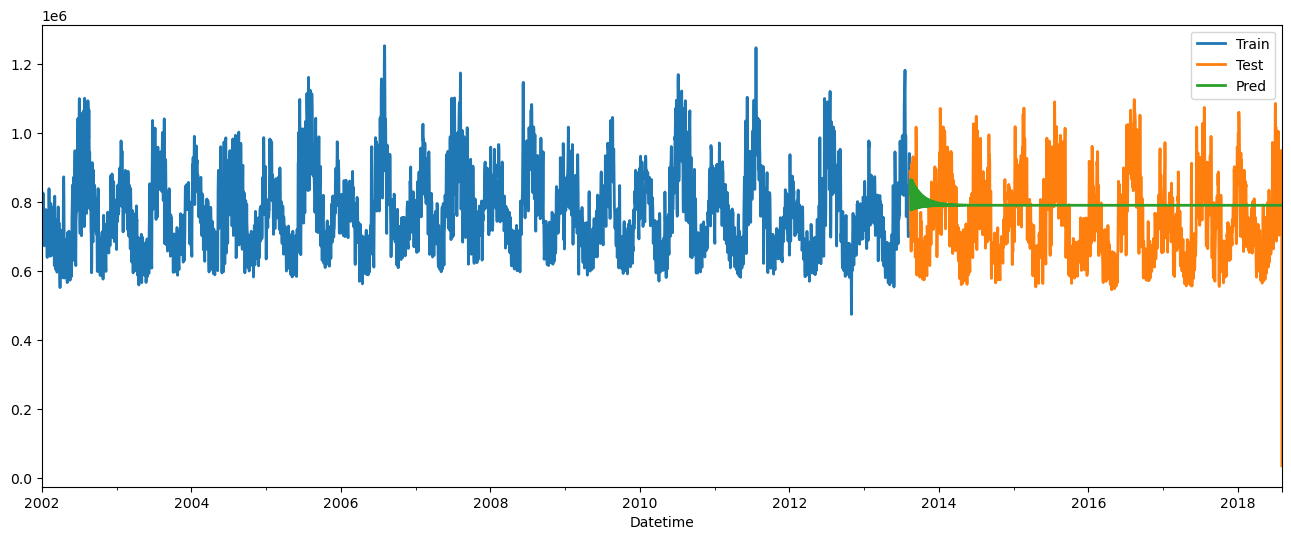

In [69]:
################################################## Daily predictions ##
predictions = model_day.predict(n_periods=len(tstd))
pred_d = pd.DataFrame(predictions, columns=['PRED'])
pred_d.index = tstd.index
plot_and_validate(trnd, tstd, pred_d, 'PJME_MW', 'PRED')

In [55]:
print(trnw.shape)
print(tstw.shape)

(606, 1)
(260, 1)


In [53]:
############ Weekly frequency 
start = time.time()
display(trnw.head())
model_week = auto_arima(trnw, m=52, trace=True, njobs= -1)
print(model_week)
print("total time taken = {}".format(time.time()-start))
#model_week = SARIMAX(data, order=(2, 0, 0), seasonal_order=(2, 0, 1, 52))

,PJME_MW
Datetime,
2002-01-01,5432091.0
2002-01-08,5248340.0
2002-01-15,5304051.0
2002-01-22,4993047.0
2002-01-29,4978830.0


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=12.35 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=17972.765, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=17326.294, Time=3.49 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=17645.855, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=20528.916, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=17367.539, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=inf, Time=36.24 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=17321.358, Time=9.30 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=17343.344, Time=1.11 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=17340.889, Time=48.20 sec
 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=inf, Time=31.15 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=17335.049, Time=5.54 sec
 ARIMA(1,0,0)(2,0,2)[52] intercept   : AIC=inf, Time=45.58 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(2,0,0)(1,0,1)[52] inter

In [56]:
model_w = SARIMAX(trnd, order=(2, 0, 0), seasonal_order=(2, 0, 1, 52))
# Fit the model
results = model_w.fit()
# Print the model summary
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              PJME_MW   No. Observations:                 4241
Model:             SARIMAX(2, 0, 0)x(2, 0, [1], 52)   Log Likelihood              -52560.273
Date:                              Wed, 10 Jul 2024   AIC                         105132.546
Time:                                      14:25:25   BIC                         105170.661
Sample:                                  01-01-2002   HQIC                        105146.016
                                       - 08-11-2013                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1657      0.016     73.675      0.000       1.135       1.197
ar.L2         -0.16

NameError: name 'te' is not defined

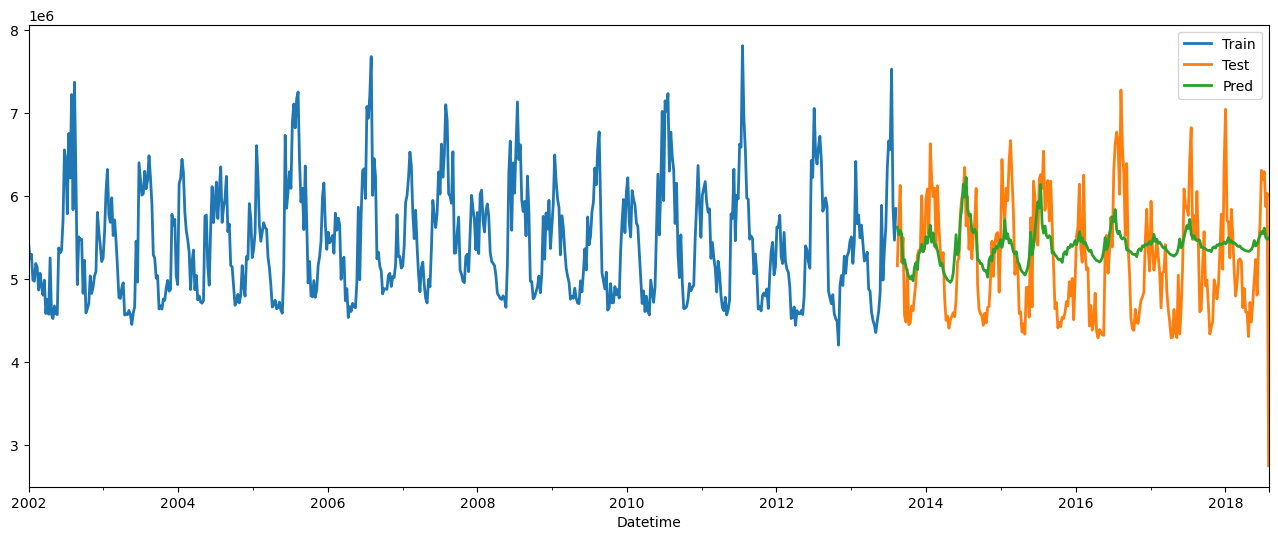

In [57]:
# Weekly predictions ##
predictions = model_week.predict(n_periods=len(tstw))
pred_w = pd.DataFrame(predictions, columns=['PRED'])
pred_w.index = tstw.index
plot_and_validate(trnw, tstw, pred_w, 'PJME_MW', 'PRED')

In [ ]:
### Weekly Model evaluation

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Calculate MAE
mae = mean_absolute_error(tstw, pred_w)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(tstw, pred_w)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate MAPE
mape = mean_absolute_percentage_error(tstw, pred_w)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error (MAE): 497838.0374712632
Mean Squared Error (MSE): 368283284289.2267
Mean Absolute Percentage Error (MAPE): 0.09925747206234808


(140, 1)
(60, 1)


In [59]:
############ Modelling Monthly frequency of the time series #################################################### 
start = time.time()
display(trnm.head())
model_month = auto_arima(trnm, m=12, trace=True, njobs= -1)
print(model_month)
print("total time taken = {}".format(time.time()-start))

,PJME_MW
Datetime,
2002-01-31,23089022.0
2002-02-28,20320720.0
2002-03-31,21483191.0
2002-04-30,20516472.0
2002-05-31,20886798.0


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4546.796, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4460.044, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4438.011, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5155.478, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4494.098, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=4439.655, Time=0.39 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=4423.041, Time=0.16 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=4424.944, Time=0.98 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=4478.752, Time=0.12 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=4421.874, Time=0.34 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=4436.959, Time=0.11 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=4412.016, Time=1.17 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=4416.494, Time=0.53 sec
 ARIMA(1,0,1)(2,0,2)[12]

In [61]:
### Monthly predictions 
model_m = SARIMAX(trnm, order=(1, 0, 1), seasonal_order=(2, 0, 1, 12))
# Fit the model
results = model_m.fit()
# Print the model summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            PJME_MW   No. Observations:                  140
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 12)   Log Likelihood               -2227.113
Date:                            Wed, 10 Jul 2024   AIC                           4466.227
Time:                                    14:28:53   BIC                           4483.876
Sample:                                01-31-2002   HQIC                          4473.399
                                     - 08-31-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9857      0.059     16.800      0.000       0.871       1.101
ma.L1         -0.6691      0.309   

               PJME_MW
Datetime              
2013-09-30  21489121.0
2013-10-31  20782477.0
2013-11-30  21517162.0
2013-12-31  24412756.0
2014-01-31  27296284.0


NameError: name 'te' is not defined

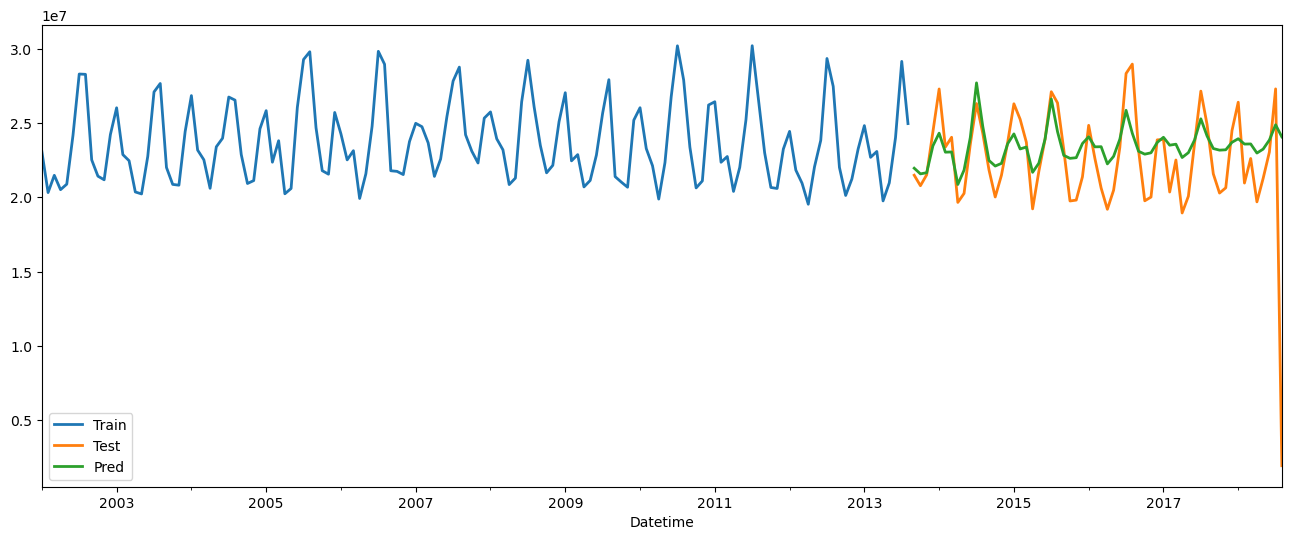

In [65]:
## Monthly ##
print(tstm.head())
predictions = model_month.predict(n_periods=len(tstm))
pred_m = pd.DataFrame(predictions, columns=['PRED'])
pred_m.index = tstm.index
plot_and_validate(trnm, tstm, pred_m, 'PJME_MW', 'PRED')

In [66]:
# Calculate MAE
mae = mean_absolute_error(tstm, pred_m)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(tstm, pred_m)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate MAPE
mape = mean_absolute_percentage_error(tstm, pred_m)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Error (MAE): 1929262.217310148
Mean Squared Error (MSE): 11924466383966.496
Mean Absolute Percentage Error (MAPE): 0.2622225873042531


In [67]:
print(trnm.shape)
print(tstm.shape)

(140, 1)
(60, 1)
